# 100_Movie_Details_Analysis

### Purpose

The purpose of this notebook is to analyse the Movie Details dataset in order to look for some interesting trends and insights. This will give us a greater understanding of the data and will help us answer our research question which states "How does the prominence and popularity of movie genres change over time?". While that is our main focus we will look for any other trends which may arise from the dataset.  

# Loading the dataset

We started by importing all the libraries and loading in the previously created pickle which contains the cleaned dataset.

In [84]:
import pandas as pd
import os.path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import DataFrame

In [85]:
details = pd.read_pickle('../../data/processed/Movies_Details.pkl')

We imported the previously prepared pickle of the dataset

In [86]:
details.head()

,Movie ID,Genres,Popularity,Released,Runtime,Movie Title,Average Rating,Number of Ratings,Drama,Crime,...,Romance,Fantasy,War,Family,Music,History,TV Movie,Foreign,Year,Month
0,2,Drama|Crime,0.823904,1988-10-21,69.0,Ariel,7.1,40,1,1,...,0,0,0,0,0,0,0,0,1988,10
1,3,Drama|Comedy,0.474450,1986-10-16,76.0,Shadows in Paradise,7.0,32,1,0,...,0,0,0,0,0,0,0,0,1986,10
2,5,Crime|Comedy,1.698000,1995-12-25,98.0,Four Rooms,6.5,485,0,1,...,0,0,0,0,0,0,0,0,1995,12
3,6,Action|Thriller|Crime,1.322870,1993-10-15,110.0,Judgment Night,6.5,69,0,1,...,0,0,0,0,0,0,0,0,1993,10
4,8,Documentary,0.054716,2006-01-01,80.0,Life in Loops (A Megacities RMX),6.4,4,0,0,...,0,0,0,0,0,0,0,0,2006,1


# Data Analysis

We decided to carry out an exploratory analysis on the data. Some visualisations may be used to answer our research question while others will just be used to try to get a greater insight into the dataset.

# Genre Prominence

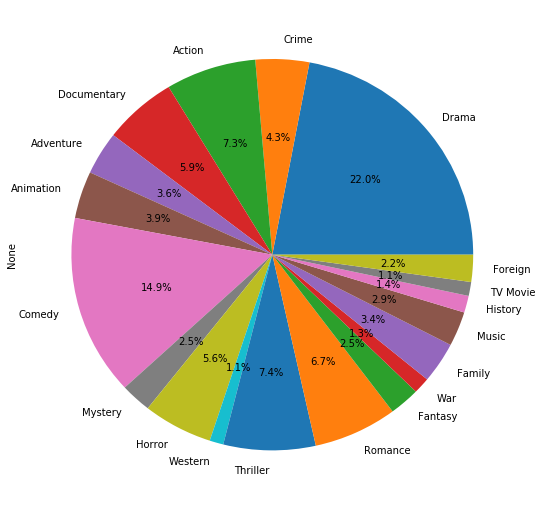

In [87]:
details[['Drama', 'Crime', 'Action', 'Documentary', 'Adventure', 'Animation', 
         'Comedy', 'Mystery', 'Horror', 'Western', 'Thriller', 'Romance', 
         'Fantasy', 'War', 'Family', 'Music', 'History', 'TV Movie', 'Foreign'
        ]].sum().plot(kind = 'pie', figsize = (9,9), y = 'Movies', autopct='%1.1f%%')


This chart shows the prominence of movie genres from 1874 - 2017. This chart will be used to answer our research question as it gives us a great insight into the percentages all the different genres make up. Drama and Comedy movies are the most prominent with no other genres coming close.

## Releases for the five most prominent genres over time

Text(0,0.5,'Releases')

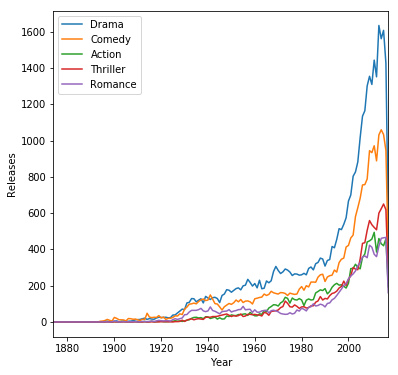

In [88]:
details.groupby(['Year'])[['Drama','Comedy', 'Action', 'Thriller', 'Romance']].sum().plot(figsize = (6,6))
plt.ylabel('Releases')

This graph explores how the prominence of movie genres changed over time. The graph is only analysing the 5 genres as analysing any more may make it unreadable. The correlation is positive and there has been a great increase in movie releases from the years 2000 onwards.

## The number of releases of the most prominent genres by month

Text(0,0.5,'Releases')

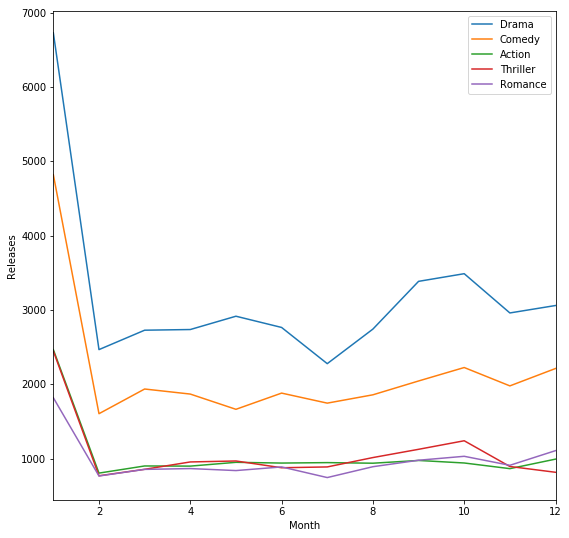

In [89]:
details.groupby(['Month'])[['Drama','Comedy', 'Action', 'Thriller', 'Romance']].sum().plot(figsize = (9,9))
plt.ylabel('Releases')

This graph explores how the prominence of movies genres throughout the month. There is a clear decrease from January onwards and a dip mid-way through the year. However, other than that, this graph doesn't really show much useful information. The Oscars are in Februrary so one possible reason for the drastic fall in releases from January to February might be that a lot of movies are released with aims to get nominated.

## Average Rating throughout the years

Text(0,0.5,'Rating')

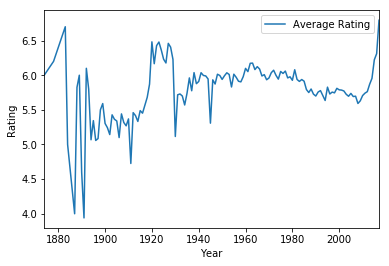

In [90]:
averagescore = details.groupby(['Year'])[['Average Rating']].mean()
averagescore.plot()
plt.ylabel('Rating')

Movies tend to get better reviews from the years 2000 onwards. This suggests that movies are getting better. There are some major dips around 1880 - 1900 which may suggest missing data.

## Average Runtime of movies over time

Text(0,0.5,'Minutes')

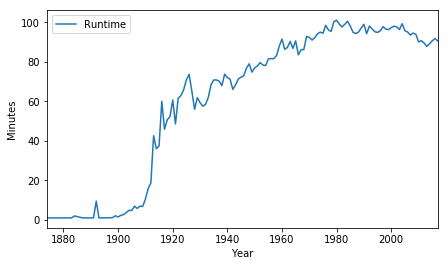

In [91]:
averagescore = details.groupby(['Year'])[['Runtime']].mean()
averagescore.plot(figsize = (7,4))
plt.ylabel('Minutes')

Interestingly, the runtime of movies has quite a positive correlation. It seems that it went down a bit when it hit the 2000's but its going back up.

## Average Rating by month

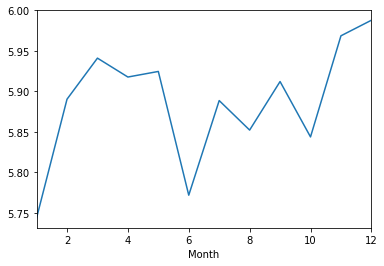

In [92]:
averagescore = details.groupby(['Month'])['Average Rating'].mean()
averagescore.plot()

It is interesting to see that movies tend to have lower ratings at the start of the year and mid-way through. Seems like there is a dip in ratings every 2 months excluding February and December.

## Analysis of year 1990 - 2016

Due to there being so many rows in this dataset, we decided to focus on a smaller sample, this will include information about movies between 1990 to 2016 as the dataset didn't include all releases for 2017.

In [93]:
x = details[(details.Year >= 1990)&(details.Year <= 2016)]
x

,Movie ID,Genres,Popularity,Released,Runtime,Movie Title,Average Rating,Number of Ratings,Drama,Crime,...,Romance,Fantasy,War,Family,Music,History,TV Movie,Foreign,Year,Month
2,5,Crime|Comedy,1.698000,1995-12-25,98.0,Four Rooms,6.5,485,0,1,...,0,0,0,0,0,0,0,0,1995,12
3,6,Action|Thriller|Crime,1.322870,1993-10-15,110.0,Judgment Night,6.5,69,0,1,...,0,0,0,0,0,0,0,0,1993,10
4,8,Documentary,0.054716,2006-01-01,80.0,Life in Loops (A Megacities RMX),6.4,4,0,0,...,0,0,0,0,0,0,0,0,2006,1
5,9,Drama,0.001647,2004-02-09,15.0,Sunday in August,5.3,2,1,0,...,0,0,0,0,0,0,0,0,2004,2
7,12,Animation|Family,9.915573,2003-05-30,100.0,Finding Nemo,7.6,5531,0,0,...,0,0,0,1,0,0,0,0,2003,5
8,13,Comedy|Drama|Romance,10.351236,1994-06-07,142.0,Forrest Gump,8.2,7204,1,0,...,1,0,0,0,0,0,0,0,1994,6
9,14,Drama,8.191009,1999-09-15,122.0,American Beauty,7.9,2994,1,0,...,0,0,0,0,0,0,0,0,1999,9
11,16,Drama|Crime|Music,2.106217,2000-05-17,140.0,Dancer in the Dark,7.6,348,1,1,...,0,0,0,0,1,0,0,0,2000,5
12,17,Horror|Thriller|Mystery,1.253999,2006-01-26,87.0,The Dark,5.6,69,0,0,...,0,0,0,0,0,0,0,0,2006,1
13,18,Adventure|Fantasy|Action|Thriller|Science Fiction,9.233786,1997-07-05,126.0,The Fifth Element,7.2,3629,0,0,...,0,1,0,0,0,0,0,0,1997,7


## Number of releases of all genres 1990 - 2016

Text(0,0.5,'Releases')

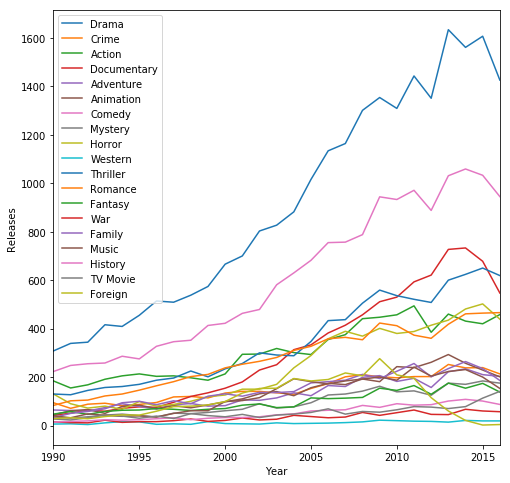

In [94]:
x.groupby(['Year'])[['Drama', 'Crime', 'Action', 'Documentary', 'Adventure', 'Animation', 
         'Comedy', 'Mystery', 'Horror', 'Western', 'Thriller', 'Romance', 
         'Fantasy', 'War', 'Family', 'Music', 'History', 'TV Movie', 'Foreign'
        ]].sum().plot(figsize = (8,8))
plt.ylabel('Releases')

Once again we can see that there is a great increase of releases from the years 2000 onwards. With Drama and Comedy being the most prominent genres. Generally the correlation is quite positive, however, due to there being so much information portrayed in this graph, it is hard to see which colour represents which genre.

## Genre Popularity

To calculate genre popularity, we grouped each genre by year, found its average popularity for that year, then saved the result into a new dataset. This will all be merged into one dataset which will consist of the average popularity for each genre by year.

In [95]:
drama = x.groupby(['Year', 'Drama'], as_index=False)['Popularity'].aggregate(np.mean) 
popdrama = drama[np.all(drama != 0, axis=1)]

romance = x.groupby(['Year', 'Romance'], as_index=False)['Popularity'].aggregate(np.mean)
popromance = romance[np.all(romance != 0, axis=1)]

action = x.groupby(['Year', 'Action'], as_index=False)['Popularity'].aggregate(np.mean)
popaction = action[np.all(action != 0, axis=1)]

comedy = x.groupby(['Year', 'Comedy'], as_index=False)['Popularity'].aggregate(np.mean)
popcomedy = comedy[np.all(comedy != 0, axis=1)]

documentary = x.groupby(['Year', 'Documentary'], as_index=False)['Popularity'].aggregate(np.mean)
popdocumentary = documentary[np.all(documentary != 0, axis=1)]

horror = x.groupby(['Year', 'Horror'], as_index=False)['Popularity'].aggregate(np.mean)
pophorror = horror[np.all(horror != 0, axis=1)]

thriller= x.groupby(['Year', 'Thriller'], as_index=False)['Popularity'].aggregate(np.mean)
popthriller = thriller[np.all(thriller != 0, axis=1)]

scifi= x.groupby(['Year', 'Science Fiction'], as_index=False)['Popularity'].aggregate(np.mean)
popscifi = scifi[np.all(scifi != 0, axis=1)]

crime= x.groupby(['Year', 'Crime'], as_index=False)['Popularity'].aggregate(np.mean)
popcrime = crime[np.all(crime != 0, axis=1)]

adventure = x.groupby(['Year', 'Adventure'], as_index=False)['Popularity'].aggregate(np.mean)
popadventure = adventure[np.all(adventure != 0, axis=1)]

animation = x.groupby(['Year', 'Animation'], as_index=False)['Popularity'].aggregate(np.mean)
popanimation = animation[np.all(animation != 0, axis=1)]

mystery = x.groupby(['Year', 'Mystery'], as_index=False)['Popularity'].aggregate(np.mean)
popmystery = mystery[np.all(mystery != 0, axis=1)]

western = x.groupby(['Year', 'Western'], as_index=False)['Popularity'].aggregate(np.mean)
popwestern = western[np.all(western != 0, axis=1)]

fantasy = x.groupby(['Year', 'Fantasy'], as_index=False)['Popularity'].aggregate(np.mean)
popfantasy = fantasy[np.all(fantasy != 0, axis=1)]

war = x.groupby(['Year', 'War'], as_index=False)['Popularity'].aggregate(np.mean)
popwar = war[np.all(war != 0, axis=1)]

family = x.groupby(['Year', 'Family'], as_index=False)['Popularity'].aggregate(np.mean)
popfamily = family[np.all(family != 0, axis=1)]

music = x.groupby(['Year', 'Music'], as_index=False)['Popularity'].aggregate(np.mean)
popmusic = music[np.all(music != 0, axis=1)]

history = x.groupby(['Year', 'History'], as_index=False)['Popularity'].aggregate(np.mean)
pophistory = history[np.all(history != 0, axis=1)]

tv = x.groupby(['Year', 'TV Movie'], as_index=False)['Popularity'].aggregate(np.mean)
poptv = tv[np.all(tv != 0, axis=1)]

foreign = x.groupby(['Year', 'Foreign'], as_index=False)['Popularity'].aggregate(np.mean)
popforeign = foreign[np.all(foreign != 0, axis=1)]

We plotted the popularity ratings

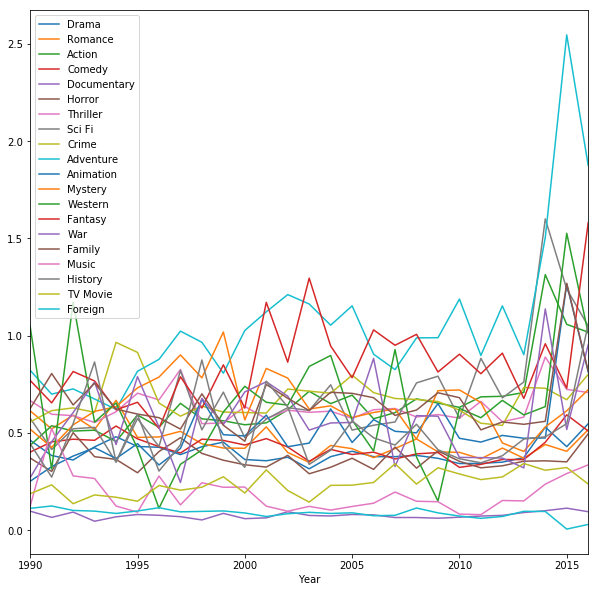

In [96]:
popdrama.groupby(['Year'])['Popularity'].mean().plot(label = 'Drama', figsize = (10,10))
popromance.groupby(['Year'])['Popularity'].mean().plot(label = 'Romance', figsize = (10,10))
popaction.groupby(['Year'])['Popularity'].mean().plot(label = 'Action',figsize = (10,10))
popcomedy.groupby(['Year'])['Popularity'].mean().plot(label = 'Comedy', figsize = (10,10))
popdocumentary.groupby(['Year'])['Popularity'].mean().plot(label = 'Documentary', figsize = (10,10))
pophorror.groupby(['Year'])['Popularity'].mean().plot(label = 'Horror', figsize = (10,10))
popthriller.groupby(['Year'])['Popularity'].mean().plot(label = 'Thriller', figsize = (10,10))
popscifi.groupby(['Year'])['Popularity'].mean().plot(label = 'Sci Fi', figsize = (10,10))
popcrime.groupby(['Year'])['Popularity'].mean().plot(label = 'Crime', figsize = (10,10))
popadventure.groupby(['Year'])['Popularity'].mean().plot(label = 'Adventure', figsize = (10,10))
popanimation.groupby(['Year'])['Popularity'].mean().plot(label = 'Animation', figsize = (10,10))
popmystery.groupby(['Year'])['Popularity'].mean().plot(label = 'Mystery', figsize = (10,10))
popwestern.groupby(['Year'])['Popularity'].mean().plot(label = 'Western', figsize = (10,10))
popfantasy.groupby(['Year'])['Popularity'].mean().plot(label = 'Fantasy', figsize = (10,10))
popwar.groupby(['Year'])['Popularity'].mean().plot(label = 'War', figsize = (10,10))
popfamily.groupby(['Year'])['Popularity'].mean().plot(label = 'Family', figsize = (10,10))
popmusic.groupby(['Year'])['Popularity'].mean().plot(label = 'Music', figsize = (10,10))
pophistory.groupby(['Year'])['Popularity'].mean().plot(label = 'History', figsize = (10,10))
poptv.groupby(['Year'])['Popularity'].mean().plot(label = 'TV Movie', figsize = (10,10))
popforeign.groupby(['Year'])['Popularity'].mean().plot(label = 'Foreign', figsize = (10,10))
plt.legend()


There seems to be no real correlation, and there is too much data on the graph to make sense of it.

## Heatmaps for genre prominence and popularity

We created a new data frame and merged all the smaller ones to create a representation of popularity of each genre by year.

In [97]:
pop = pd.DataFrame()
pop['Year'] = popdrama.Year
pop['Drama'] = popdrama.Popularity
pop['Crime'] = popcrime.Popularity
pop['Action'] = popaction.Popularity
#pop['Documentary'] = popdocumentary.Popularity
pop['Adventure'] = popadventure.Popularity
pop['Animation'] = popanimation.Popularity
pop['Comedy'] = popcomedy.Popularity
pop['Mystery'] = popmystery.Popularity
pop['Horror'] = pophorror.Popularity
#pop['Western'] = popwestern.Popularity
pop['Sci Fi'] = popscifi.Popularity
pop['Thriller'] = popthriller.Popularity
pop['Romance'] = popromance.Popularity
pop['Fantasy'] = popfantasy.Popularity
pop['War'] = popwar.Popularity
pop['Family'] = popfamily.Popularity
#pop['Music'] = popmusic.Popularity
pop['History'] = pophistory.Popularity
#pop['TV Movie'] = poptv.Popularity
#pop['Foreign'] = popforeign.Popularity

pop

,Year,Drama,Crime,Action,Adventure,Animation,Comedy,Mystery,Horror,Sci Fi,Thriller,Romance,Fantasy,War,Family,History
1,1990,0.461697,0.555855,0.435668,0.821155,0.250982,0.400908,0.518225,0.370160,0.574443,0.665192,0.612748,0.769182,0.269403,0.625199,0.444059
3,1991,0.383191,0.614096,0.536348,0.698925,0.326007,0.453491,0.425458,0.301281,0.414326,0.595523,0.519935,0.654105,0.454438,0.804969,0.272287
5,1992,0.360291,0.628161,0.509158,0.725885,0.380360,0.467053,0.540889,0.500797,0.520740,0.588103,0.590949,0.815368,0.604127,0.643455,0.547081
7,1993,0.427743,0.605444,0.513449,0.673822,0.423483,0.461537,0.610360,0.377233,0.527958,0.553422,0.517573,0.766713,0.761360,0.755175,0.864296
9,1994,0.479804,0.965214,0.455352,0.620904,0.368010,0.534815,0.633964,0.363314,0.348835,0.608297,0.667211,0.618289,0.439525,0.621934,0.350870
11,1995,0.429793,0.913516,0.591795,0.816497,0.444276,0.469097,0.731265,0.294524,0.573076,0.703951,0.476433,0.657020,0.788880,0.596473,0.594642
13,1996,0.425656,0.653209,0.528612,0.877764,0.334579,0.428924,0.786644,0.403663,0.429171,0.669234,0.478844,0.522884,0.529246,0.577950,0.303122
15,1997,0.388005,0.585733,0.651579,1.023024,0.419640,0.396120,0.900625,0.474742,0.820005,0.825720,0.507597,0.788263,0.244606,0.519209,0.438213
17,1998,0.428560,0.637001,0.571992,0.965539,0.672576,0.467414,0.782690,0.394152,0.515516,0.547007,0.443793,0.627527,0.677213,0.700480,0.874662
19,1999,0.452247,0.606830,0.561774,0.806452,0.490347,0.460878,1.018363,0.359010,0.709224,0.550820,0.421681,0.849439,0.542598,0.538968,0.435297


## Heatmap showing the popularity of each genre by year

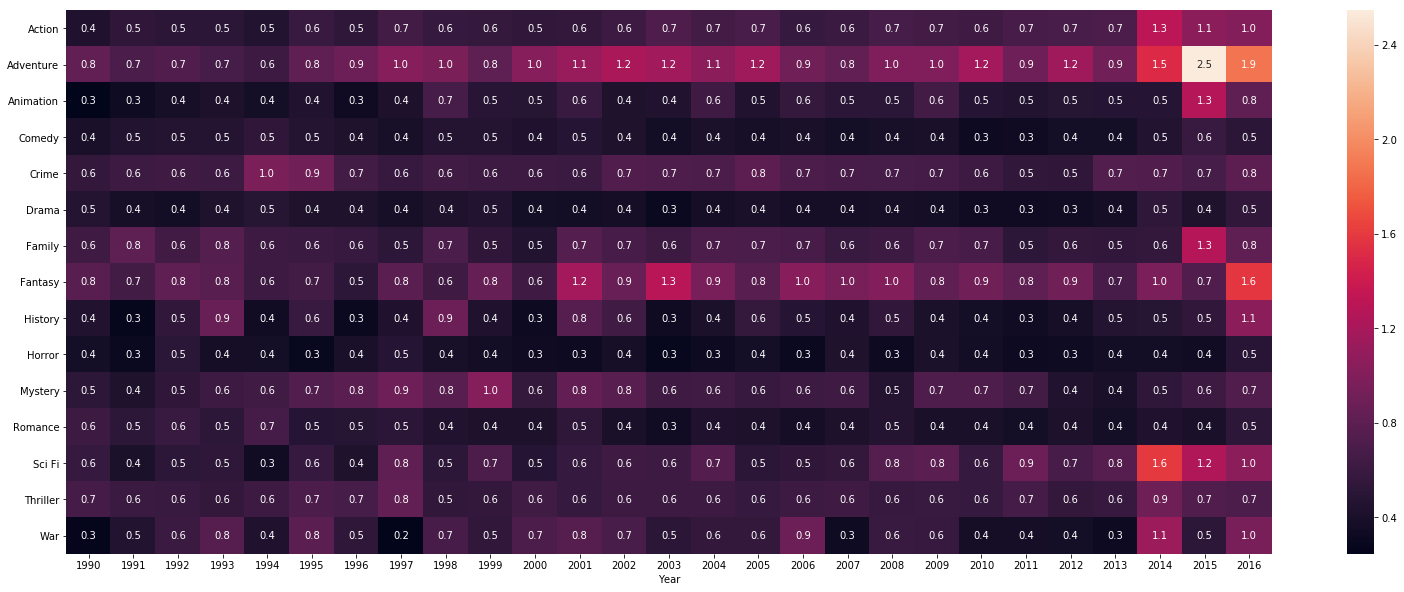

In [98]:
plt.figure(figsize = (27,10))
popdf = pop.pivot_table(index = 'Year')
tr = popdf.transpose()
sns.heatmap(tr, annot=True, fmt=".1f")

This heatmap will be used to answer one of our research questions. It shows that Adventure is the most popular genre with ones like Fantasy and Sci Fi joining it. This is not surprising as these are the genres that tend to make a lot of money and become great blockbusters.

## Heatmap showing the prominence of each genre by year

In [99]:
sum_genre = details.groupby(['Year'])[['Crime', 'Adventure', 'Animation', 
          'Mystery', 'Western', 
         'Fantasy', 'War', 'Family', 'Music', 'History', 'TV Movie', 'Foreign'
        ]].sum()

In [100]:
x = sum_genre[(sum_genre.index >= 1990)&(sum_genre.index <= 2016)]
x.head()

,Crime,Adventure,Animation,Mystery,Western,Fantasy,War,Family,Music,History,TV Movie,Foreign
Year,,,,,,,,,,,,
1990,94,64,44,35,6,47,15,33,40,14,27,29
1991,71,62,61,31,7,58,12,50,32,17,23,32
1992,88,60,66,36,4,46,11,58,48,19,32,28
1993,92,74,50,43,11,58,22,69,42,24,43,37
1994,82,90,79,47,16,63,13,94,38,22,39,44


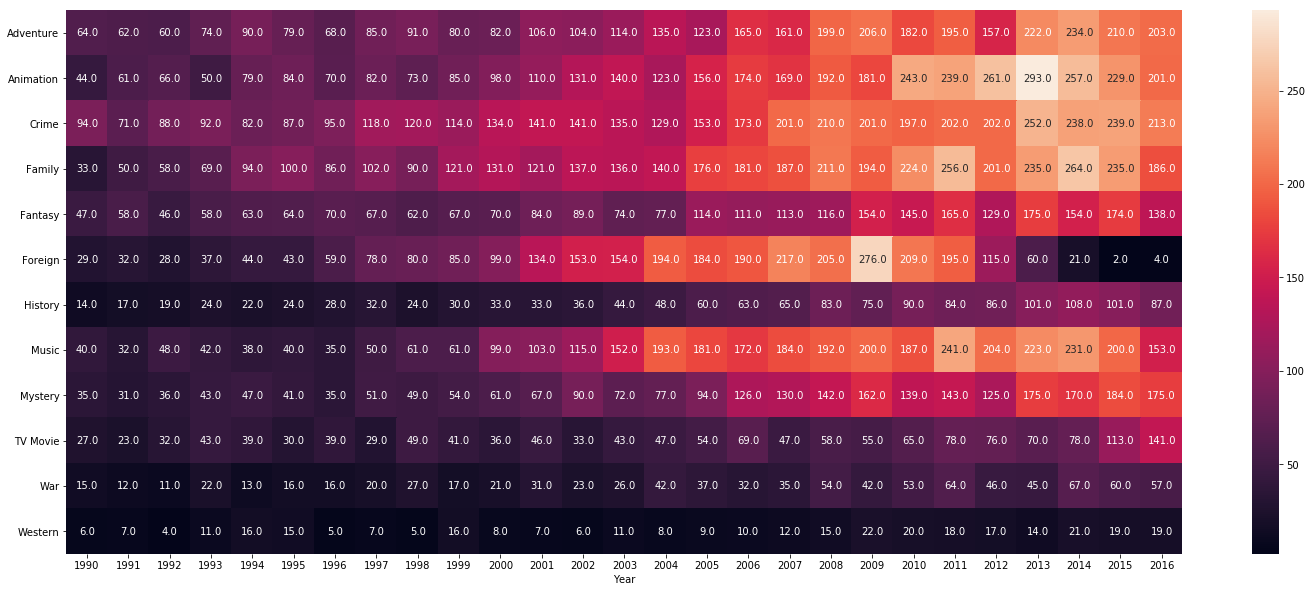

In [101]:
plt.figure(figsize = (25,10))
df = x.pivot_table(index = 'Year')
t = df.transpose()
sns.heatmap(t, annot=True, fmt=".1f")


This heatmap shows that in general, most movie genres are getting more prominent with just a few exceptions such a Foreign and Westerns. Once again it shows that more movies are being made from the years 2000 onwards. This heatmap does not include the 7 most prominent genres as it clouded the visualisation.

## Heatmap showing the 7 most prominent genres by year

In [102]:
big_genre = details.groupby(['Year'])[['Action', 'Comedy', 'Documentary', 'Drama', 'Horror', 'Romance', 'Thriller'
        ]].sum()

In [103]:
a = big_genre[(big_genre.index >= 1990)&(big_genre.index <= 2016)]
a.head()

,Action,Comedy,Documentary,Drama,Horror,Romance,Thriller
Year,,,,,,,
1990,184,223,42,308,130,83,130
1991,155,248,51,339,90,102,127
1992,168,255,64,344,72,105,145
1993,191,258,59,416,80,122,157
1994,205,286,71,409,67,130,161


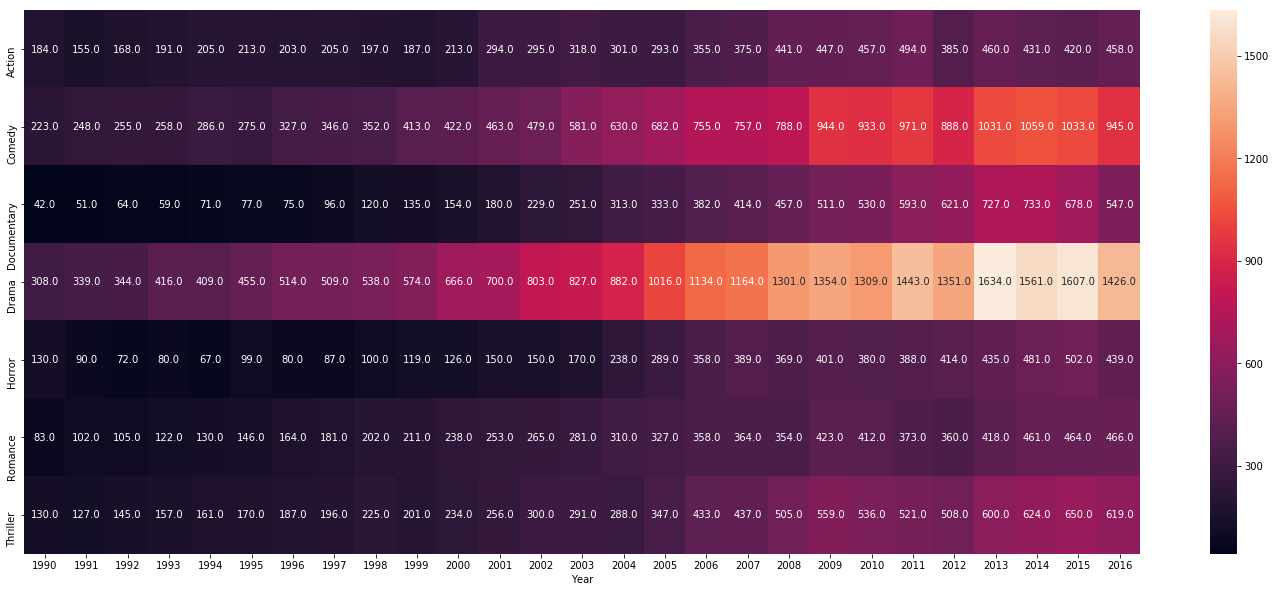

In [104]:
plt.figure(figsize = (25,10))
df = a.pivot_table(index = 'Year')
b = df.transpose()
sns.heatmap(b, annot=True, fmt=".1f")


This shows exactly how prominent genres such as Drama and Comedy are. It may be difficult to see but all genres are becoming more prominent. This will be used to help us answer our research question.

In [105]:
details.to_pickle('../../data/final/Movies_Details.pkl')